<a href="https://colab.research.google.com/github/chamisfum/Brain_Tumor_Classification_Trial/blob/master/Model_Percobaan1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import shutil
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
os.environ['CONFIG_DIR'] = "/content/drive/My Drive/RESEARCH CENTER/DATASETS/BRAIN_TUMOR/dataset"

In [ ]:
%cd /content/drive/My Drive/RESEARCH CENTER/DATASETS/BRAIN_TUMOR/dataset

/content/drive/My Drive/RESEARCH CENTER/DATASETS/BRAIN_TUMOR/dataset


In [ ]:
ls

AUGMENTATION/  draft/      percobaan/  save_model/
BALANCE/       IMBALANCE/  readme.txt  SPLIT_AUGMENTATION/


In [ ]:
ls percobaan

percobaan1.png  percobaan2.png  percobaan3.png  test/  train/  val/


In [ ]:
import tensorflow as tf
from tensorflow.keras import applications
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras import optimizers

In [ ]:
base_model = applications.MobileNetV2(include_top=False,weights='imagenet',input_shape=(128,128,3))
base_model.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
________________

In [ ]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(1028, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation = 'softmax'))
model.layers[0].trainable = True
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
flatten_1 (Flatten)          (None, 20480)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1028)              21054468  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1028)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               526848    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [ ]:
# model = Sequential()
# model.add(base_model)
# model.add(Flatten())
# model.add(Dense(300,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.005)))
# model.add(Dense(3,activation='softmax'))
# model.layers[0].trainable = False

# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=0.01,
#     decay_steps=500,
#     decay_rate=0.0001)
# opt = tf.keras.optimizers.Adamax(learning_rate=lr_schedule)

# model.compile(
#     loss='categorical_crossentropy',
#     optimizer=opt,
#     metrics=['accuracy']
# )

# model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               2457900   
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 903       
Total params: 17,173,491
Trainable params: 2,458,803
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
path_train = 'percobaan/train/'
path_val = 'percobaan/val/'
path_test = 'percobaan/test/'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(rescale=1./255,
                            #  rotation_range=40,
                            #  width_shift_range=0.2,
                            #  height_shift_range=0.2,
                            #  shear_range=0.2,
                            #  zoom_range=0.2,
                            #  horizontal_flip=True,
                             fill_mode='nearest')

training_set = datagen.flow_from_directory(path_train,
                                           target_size=(128,128),
                                           color_mode="rgb",
                                           shuffle=False,
                                           batch_size = 64,
                                           class_mode='categorical')

validation_set = datagen.flow_from_directory(path_val,
                                             target_size=(128,128),
                                             color_mode="rgb",
                                             shuffle=False,
                                             batch_size = 64,
                                             class_mode='categorical')

testing_set = datagen.flow_from_directory(path_test,
                                          target_size=(128,128),
                                          color_mode="rgb",
                                          shuffle=False,
                                          batch_size = 64,
                                          class_mode='categorical')

Found 12256 images belonging to 3 classes.
Found 2297 images belonging to 3 classes.
Found 767 images belonging to 3 classes.


In [ ]:
# Found 12256 images belonging to 3 classes.
# Found 2297 images belonging to 3 classes.
# Found 767 images belonging to 3 classes.

In [ ]:
training_set.class_indices

{'GLIOMA': 0, 'MENINGIOMA': 1, 'PITUITARY': 2}

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(lr=1e-4),
              metrics = ['acc'])

In [ ]:
ls

AUGMENTATION/  draft/      percobaan/  save_model/
BALANCE/       IMBALANCE/  readme.txt  SPLIT_AUGMENTATION/


In [32]:
filepath="/save_model/testing_v1-{epoch:02d}.h5"
checkpoint = callbacks.ModelCheckpoint(
                                       filepath,
                                       monitor='val_acc',
                                       verbose=1,
                                       save_best_only=True,
                                       mode='auto',
                                       restore_best_weights=True,
                                       )
# earlystop = callbacks.EarlyStopping(monitor='val_loss',
#                                     mode='auto',
#                                     patience=4,
#                                     restore_best_weights=True)

In [33]:
train_step_size = training_set.n//training_set.batch_size
val_step_size = validation_set.n//validation_set.batch_size

In [48]:
history = model.fit(training_set, 
                    steps_per_epoch=train_step_size, 
                    epochs=25, 
                    validation_data=validation_set, 
                    validation_steps=val_step_size, 
                    callbacks=[checkpoint])

Epoch 1/25
191/191 [==============================] - ETA: 0s - loss: 0.0213 - acc: 0.9939
Epoch 00001: val_acc did not improve from 0.94732
191/191 [==============================] - 73s 385ms/step - loss: 0.0213 - acc: 0.9939 - val_loss: 0.2315 - val_acc: 0.9438
Epoch 2/25
191/191 [==============================] - ETA: 0s - loss: 0.0122 - acc: 0.9957
Epoch 00002: val_acc did not improve from 0.94732
191/191 [==============================] - 74s 388ms/step - loss: 0.0122 - acc: 0.9957 - val_loss: 0.2298 - val_acc: 0.9451
Epoch 3/25
191/191 [==============================] - ETA: 0s - loss: 0.0106 - acc: 0.9964
Epoch 00003: val_acc improved from 0.94732 to 0.95045, saving model to /save_model/testing_v1-03.h5
191/191 [==============================] - 72s 378ms/step - loss: 0.0106 - acc: 0.9964 - val_loss: 0.2244 - val_acc: 0.9504
Epoch 4/25
191/191 [==============================] - ETA: 0s - loss: 0.0106 - acc: 0.9965
Epoch 00004: val_acc improved from 0.95045 to 0.95179, saving mo

In [49]:
model.evaluate(training_set)

192/192 [==============================] - 59s 307ms/step - loss: 8.2358e-04 - acc: 1.0000


[0.0008235778659582138, 1.0]

In [50]:
model.evaluate(testing_set)

12/12 [==============================] - 3s 282ms/step - loss: 0.2412 - acc: 0.9478


[0.2411952018737793, 0.9478487372398376]

In [51]:
model.evaluate(validation_set)

36/36 [==============================] - 10s 283ms/step - loss: 0.2197 - acc: 0.9473


[0.21972094476222992, 0.9473226070404053]

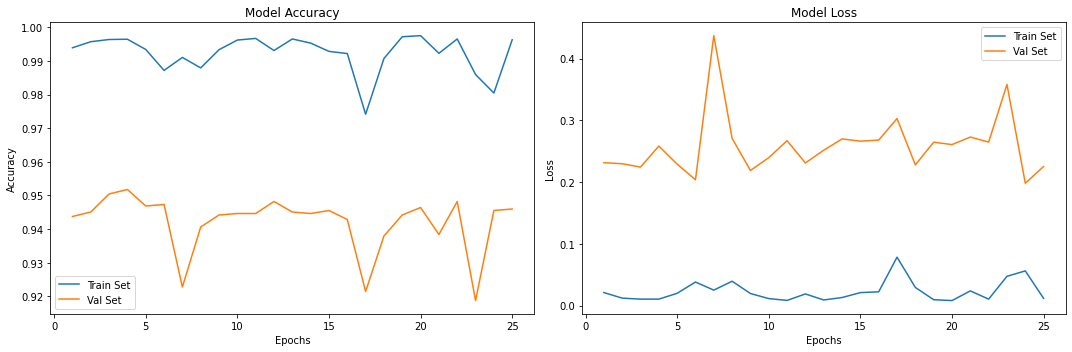

In [53]:
# plot model performance
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [43]:
ls

AUGMENTATION/  draft/      percobaan/  save_model/
BALANCE/       IMBALANCE/  readme.txt  SPLIT_AUGMENTATION/


In [45]:
model.save('save_model/P/trial_v6_model.h5') 

In [44]:
model.save_weights("save_model/P/trial_v6_weights.h5")

In [47]:
ls save_model/P

trial_v5_model2.h5  trial_v5_weights2.h5  trial_v6_model.h5
trial_v5_model.h5   trial_v5_weights.h5   trial_v6_weights.h5
